# Linear Regression from Scratch

# Import Libraries

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Create dataset

## Create X and Y

In [178]:
# Number of examples
n = 100
limit = 100

# Create independent variable x
x = np.random.randint(0, limit, (n))

# Create dependent variable y
y = 4.5 * x + np.random.randint(-limit, limit, (n)) * np.random.uniform(0, 1, (n))

In [179]:
print(f"X: {len(x)} values")
print(f"Y: {len(y)} values")

X: 100 values
Y: 100 values


## Plot X and Y

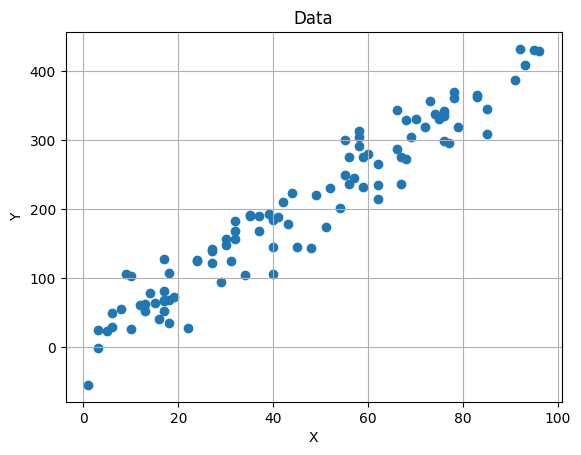

In [180]:
plt.scatter(x, y)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In the folloming code me will attempt to find a best-fit regression line to model this data.

# Model

In [181]:
def forward_prop(x: np.ndarray, m: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Calculates y_hat"""
    
    return m * x + b

def calc_loss(y_hat: np.ndarray, y_true: np.ndarray) -> np.ndarray:
    """Calculates the loss"""

    return (y_hat - y_true) ** 2

def loss_derivative(y_hat: np.ndarray, y_true: np.ndarray) -> np.ndarray:
    """Calculates the derivative of the loss mith respect to y_hat"""

    return 2 * (y_hat - y_true)

def gradient_descent(x: np.ndarray, y: np.ndarray, y_hat: np.ndarray, m: float, b: float, learning_rate: float) -> tuple:
    """Calculates the derivative of the loss mith respect to the model parameters and updates them using gradient descent."""
    
    # calculate partial derivative of loss mith respect to y_hat
    dloss_dyhat = loss_derivative(y_hat, y)

    # calculate partial derivative of loss mith respect to m
    dloss_dm = dloss_dyhat * x

    # calculate parital derivative of loss mith respect to b
    dloss_db = dloss_dyhat

    # take average of derivatives
    dloss_dm = np.average(dloss_dm)
    dloss_db = np.average(dloss_db)

    # update parameters
    m -= learning_rate * dloss_dm
    b -= learning_rate * dloss_db

    return m, b


def train(x: np.ndarray, y: np.ndarray, m: float, b: float, epochs: int, learning_rate: float) -> tuple:
    """Finds the best-fit regression line. Retuns the slope 'm' and the y-intercept 'b'"""
    
    for e in range(1, epochs+1):
        print(f"Epoch {e}")
        # calculate y_hat using the formula m*x+b
        y_hat = forward_prop(x, m, b)
        # calculate the loss
        loss = np.average(calc_loss(y_hat, y))
        print(f"Loss: {loss}\n")
        # update the slope 'm' and y-intercept 'b' using gradient descent
        m, b = gradient_descent(x, y, y_hat, m, b, learning_rate)

    return m, b

# Training

In [182]:
# Initial slope (co-effecient)
m = np.random.randint(1, 10)

# Initial y_intercept (bias)
b = np.random.randint(1, 10)

# Number of epochs to train for
epochs = 10

# Controls how aggressively the model should update the parameters
# A small learning rate means slower but more accurate updates
# A large learning rate means faster but more inaccurate updates
learning_rate = 0.0001

# Find the best-fit line
m, b = train(x, y, m, b, epochs, learning_rate)

Epoch 1
Loss: 14999.274651648544

Epoch 2
Loss: 3798.154568986231

Epoch 3
Loss: 1531.76500758041

Epoch 4
Loss: 1073.1927214023576

Epoch 5
Loss: 980.4068786949227

Epoch 6
Loss: 961.632787111888

Epoch 7
Loss: 957.8339342438771

Epoch 8
Loss: 957.0651106916904

Epoch 9
Loss: 956.9093710470119

Epoch 10
Loss: 956.877680340962



In [183]:
print("Learned parameters:")
print(f"m = {m}")
print(f"b = {b}")

Learned parameters:
m = 4.258294225532394
b = 8.035834440952783


# Plot regression line

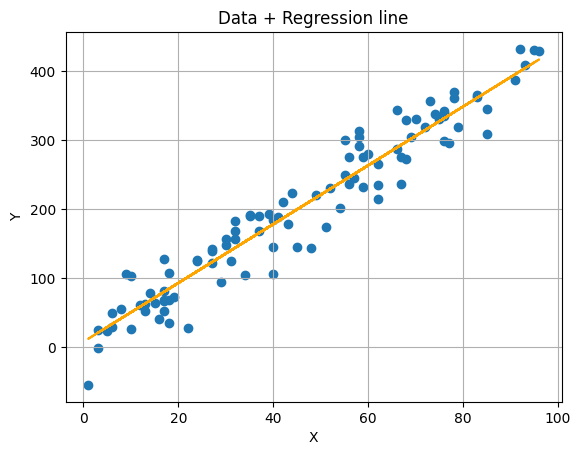

In [184]:
plt.scatter(x, y)
plt.plot(x, m*x+b, color="orange")
plt.title("Data with learned Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()